K-MEANS

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yellowbrick as yellowbrick
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
df = pd.read_csv("data/USArrests.csv", index_col=0)
df.head()

In [ ]:
df.describe().T

In [ ]:
df.hist(figsize=(10, 10));

In [ ]:
kmeans = KMeans(n_clusters=4)

In [ ]:
k_fit = kmeans.fit(df)
k_fit.n_clusters

In [ ]:
k_fit.cluster_centers_

In [ ]:
k_fit.labels_

In [ ]:
k_means = KMeans(n_clusters=2).fit(df)
kumeler = k_means.labels_
kumeler

In [ ]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kumeler, s=50, cmap="viridis")

In [ ]:
merkezler = k_means.cluster_centers_
merkezler

In [ ]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kumeler, s=50, cmap="viridis")
plt.scatter(merkezler[:, 0], merkezler[:, 1], c="black", s=200, alpha=0.5)

ELBOW YONTEMI

In [ ]:
ssd = []

K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

In [ ]:
plt.plot(K, ssd, "bx-")
plt.xlabel("K değerlerine karşılık uzaklık artık toplamları")
plt.title("Optimum küme sayısı için Elbow yöntemi")

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 20))
visu.fit(df)
visu.poof()

In [ ]:
kmeans = KMeans(n_clusters=4).fit(df)

In [ ]:
kumeler = kmeans.labels_

In [ ]:
pd.DataFrame({"Eyaletler": df.index, "Kumeler": kumeler})

In [ ]:
df["Kume_No"] = kumeler
df

HIERARCHICAL CLUSTER ANALYSIS

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik kümeleme dendogramı")
plt.xlabel("Gözlem birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,
           leaf_font_size=10);

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik kümeleme dendogramı")
plt.xlabel("Gözlem birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,
           truncate_mode="lastp",
           p=4,
           show_contracted=True,
           leaf_font_size=10);

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik kümeleme dendogramı")
plt.xlabel("Gözlem birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           leaf_font_size=10);

PRINCIPAL COMPONENT ANALYSIS

In [62]:
df = pd.read_csv("data/Hitters.csv")
df.dropna(inplace=True)
df = df._get_numeric_data()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [64]:
df = StandardScaler().fit_transform(df)

In [66]:
df[0:5, 0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [68]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

In [70]:
bilesen_df = pd.DataFrame(data=pca_fit, columns=["birinci_bilesen", "ikinci_bilesen"])
bilesen_df

,birinci_bilesen,ikinci_bilesen
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674
...,...,...
258,-0.152111,-0.331665
259,3.241373,-0.391942
260,-1.206322,-0.625714
261,2.084856,-2.059851


In [71]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801])

In [73]:
pca.components_[1]

array([-0.38407792, -0.37764493, -0.22866298, -0.37459128, -0.31026531,
       -0.23115759,  0.26820405,  0.19641268,  0.18589726,  0.13386448,
        0.17692929,  0.17283361,  0.19698297, -0.16295204, -0.17624626,
       -0.20978299, -0.05452611])

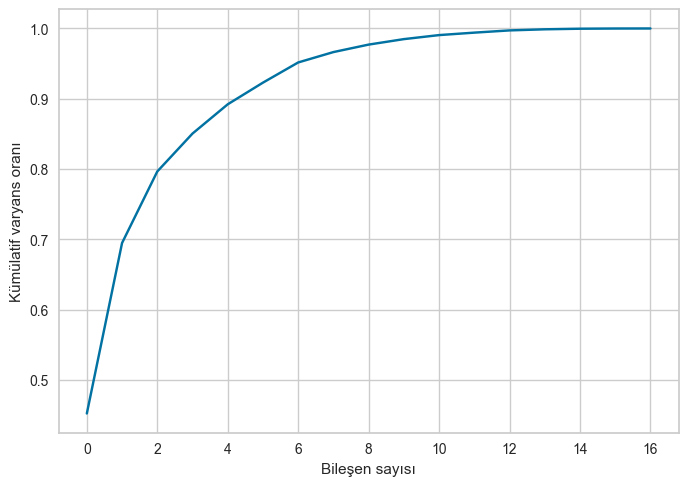

In [78]:
# optimum bileşen sayisi

pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen sayısı")
plt.ylabel("Kümülatif varyans oranı");